In [128]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy as cp
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from pylab import *

In [51]:
data = xr.open_dataset('india.1960.1990.pre.JJAS.nc')

In [52]:
# choosung the precipitation variable names pre

data = data.pre

In [53]:
data.attrs

{'long_name': 'precipitation',
 'units': 'mm/month',
 'correlation_decay_distance': 450.0}

In [54]:
mean_data = xr.open_dataset('india.mean.1960.1990.pre.JJAS.nc')

In [55]:
mean_data = mean_data.pre

In [56]:
mean_data

<xarray.DataArray 'pre' (time: 1, lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1975-07-31T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    cell_methods:                time: mean
    correlation_decay_distance:  450.0

In [57]:
time = mean_data.time

In [58]:
print(len(time))

1


In [59]:
anomaly_data = xr.open_dataset('anomaly.jjas.nc')
anomaly_data = anomaly_data.pre
anomaly_data_mean = anomaly_data.mean(dim='time')

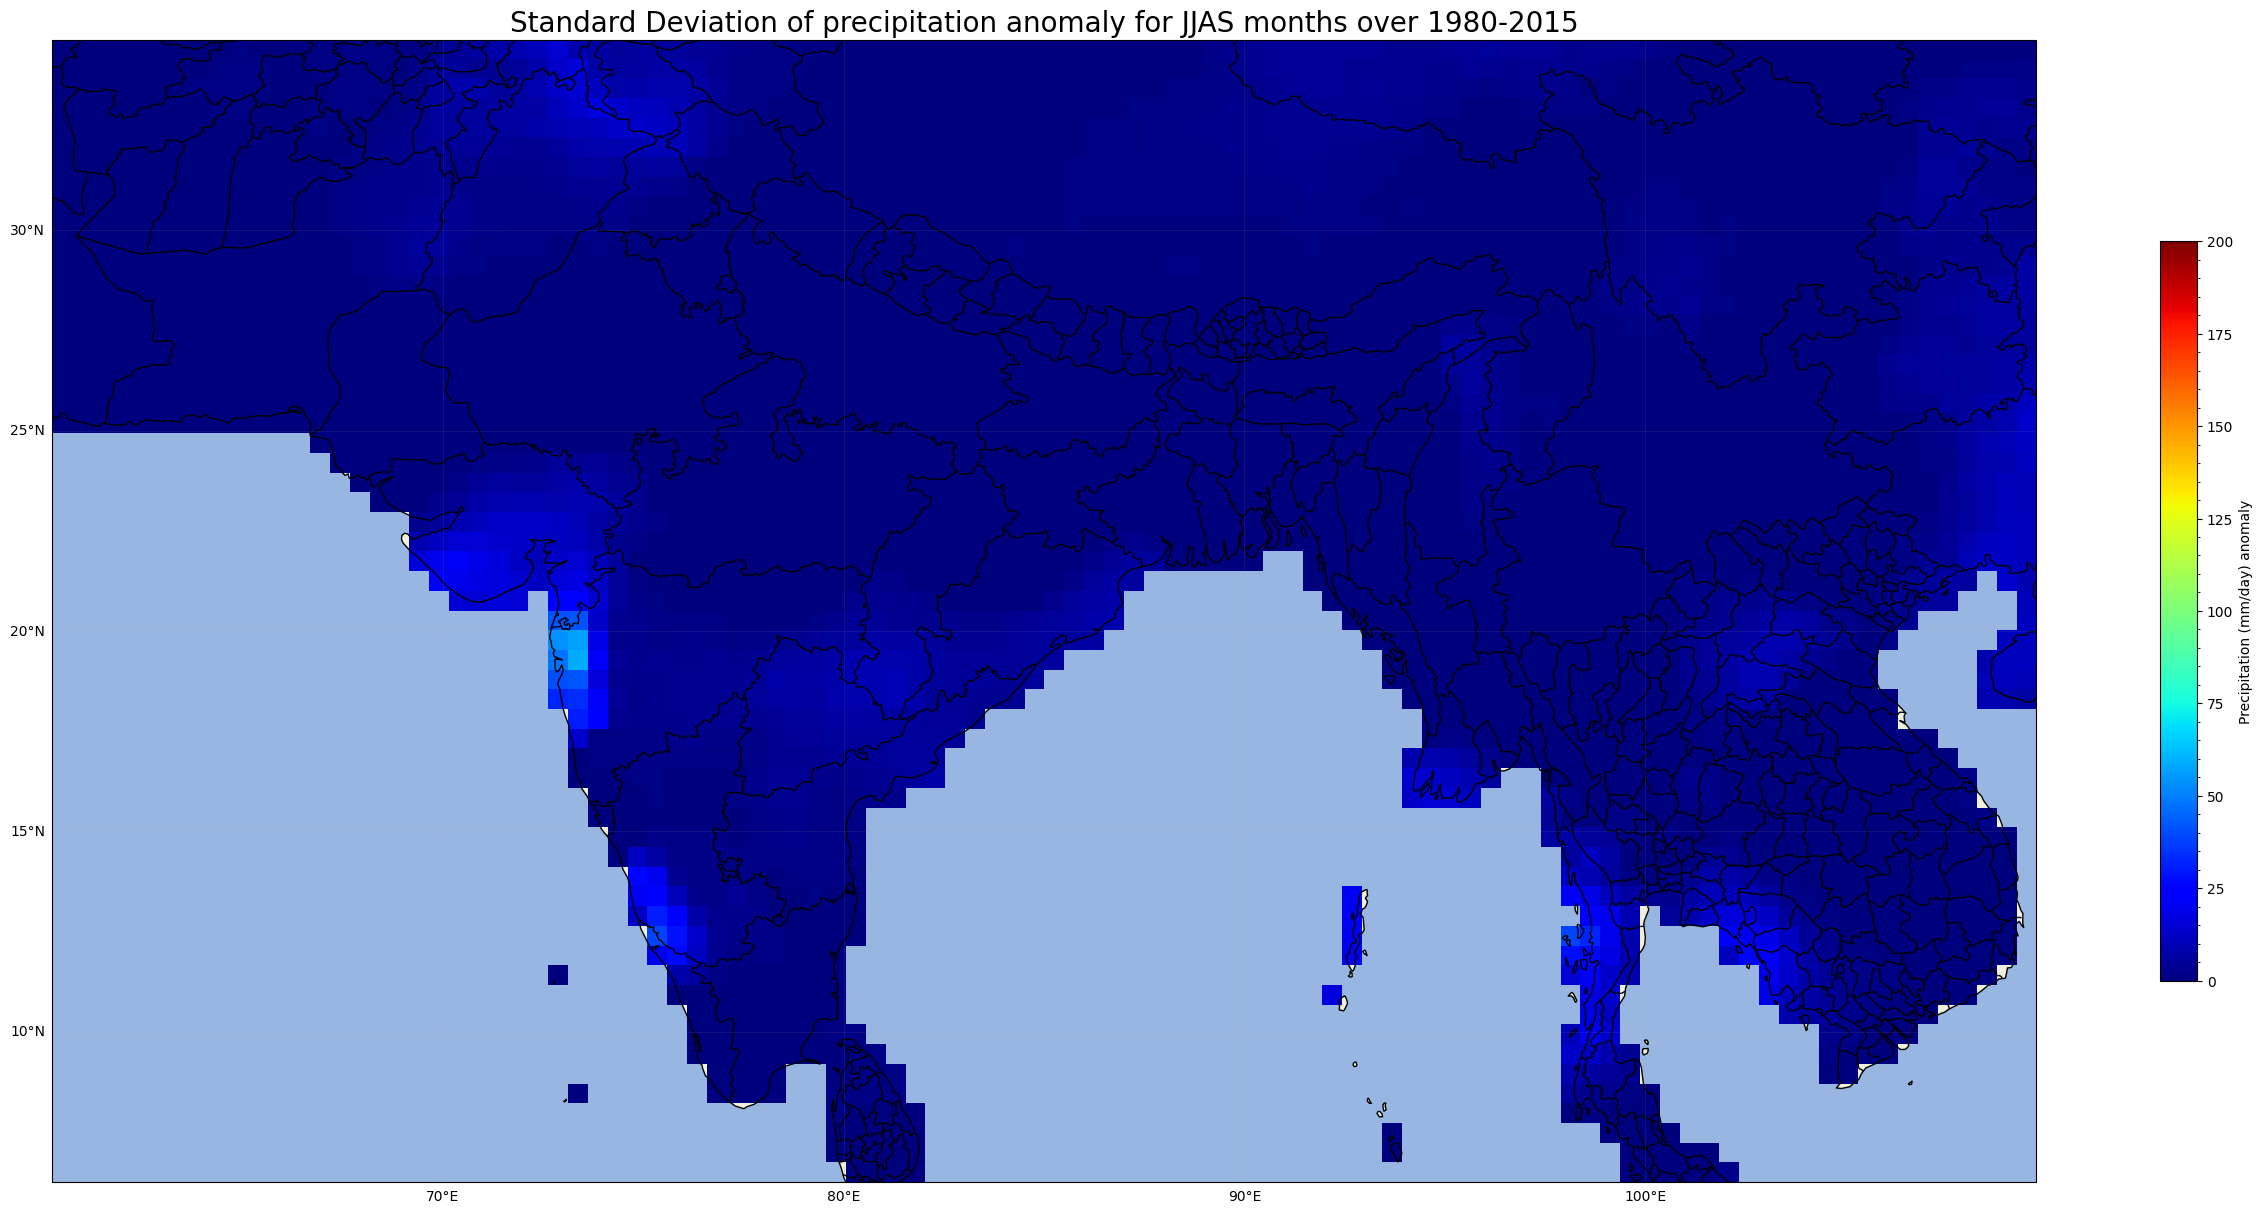

In [60]:
# importing the required libraries

# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr


# # loading the cru datasets 

# t_min_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmn.1981.2020_MAM.nc')
# t_max_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmx.1981.2020_MAM.nc')
# # t_max_dataset

# t_min_mam = t_min_mam.tmn
# t_max_mam = t_max_mam.tmx

lon = anomaly_data.lon
lat = anomaly_data.lat


# t_min_mam_mean = t_min_mam.mean(dim='time')
# t_max_mam_mean = t_max_mam.mean(dim='time')

# # difference between t_min_mam and t_max_mam to get the diurnal temperature range for mam months

# t_dtr_mam = t_max_mam_mean - t_min_mam_mean



fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(anomaly_data_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower', vmin=0 ,vmax=200)
plt.title('Standard Deviation of precipitation anomaly for JJAS months over 1980-2015',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Precipitation (mm/day) anomaly')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)

In [61]:
# anomaly_data = anomaly_data.pre

In [62]:
anomaly_data_mean

<xarray.DataArray 'pre' (lat: 58, lon: 100)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.01037184,  0.00593638,  0.00575718, ...,  3.3741193 ,
         3.7730076 ,  2.9474719 ],
       [ 0.01048386,  0.01337367,  0.01030468, ...,  0.83951735,
         1.3114654 ,  2.1963444 ],
       [-0.01514343,  0.01883959,  0.01350805, ..., -0.532213  ,
        -0.32376528, -0.3078171 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75

In [63]:
std_data = xr.open_dataset('std.anomaly.jjas.nc')

In [64]:
std_data = std_data.pre

In [65]:
std_data

<xarray.DataArray 'pre' (time: 1, lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1998-01-30T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

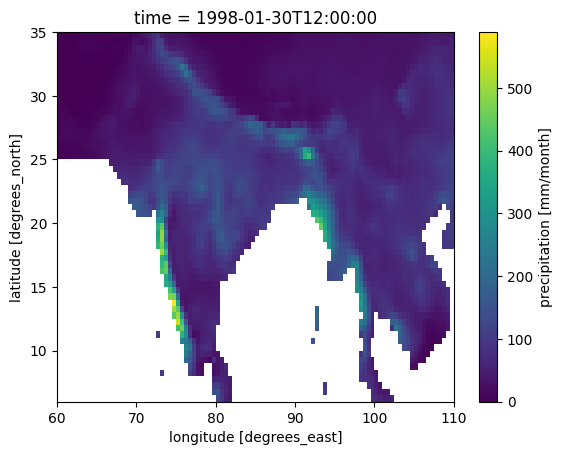

In [66]:
std_data.squeeze().plot()

In [67]:
std_data_mean = std_data.squeeze()

In [68]:
std_data_mean

<xarray.DataArray 'pre' (lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 1998-01-30T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

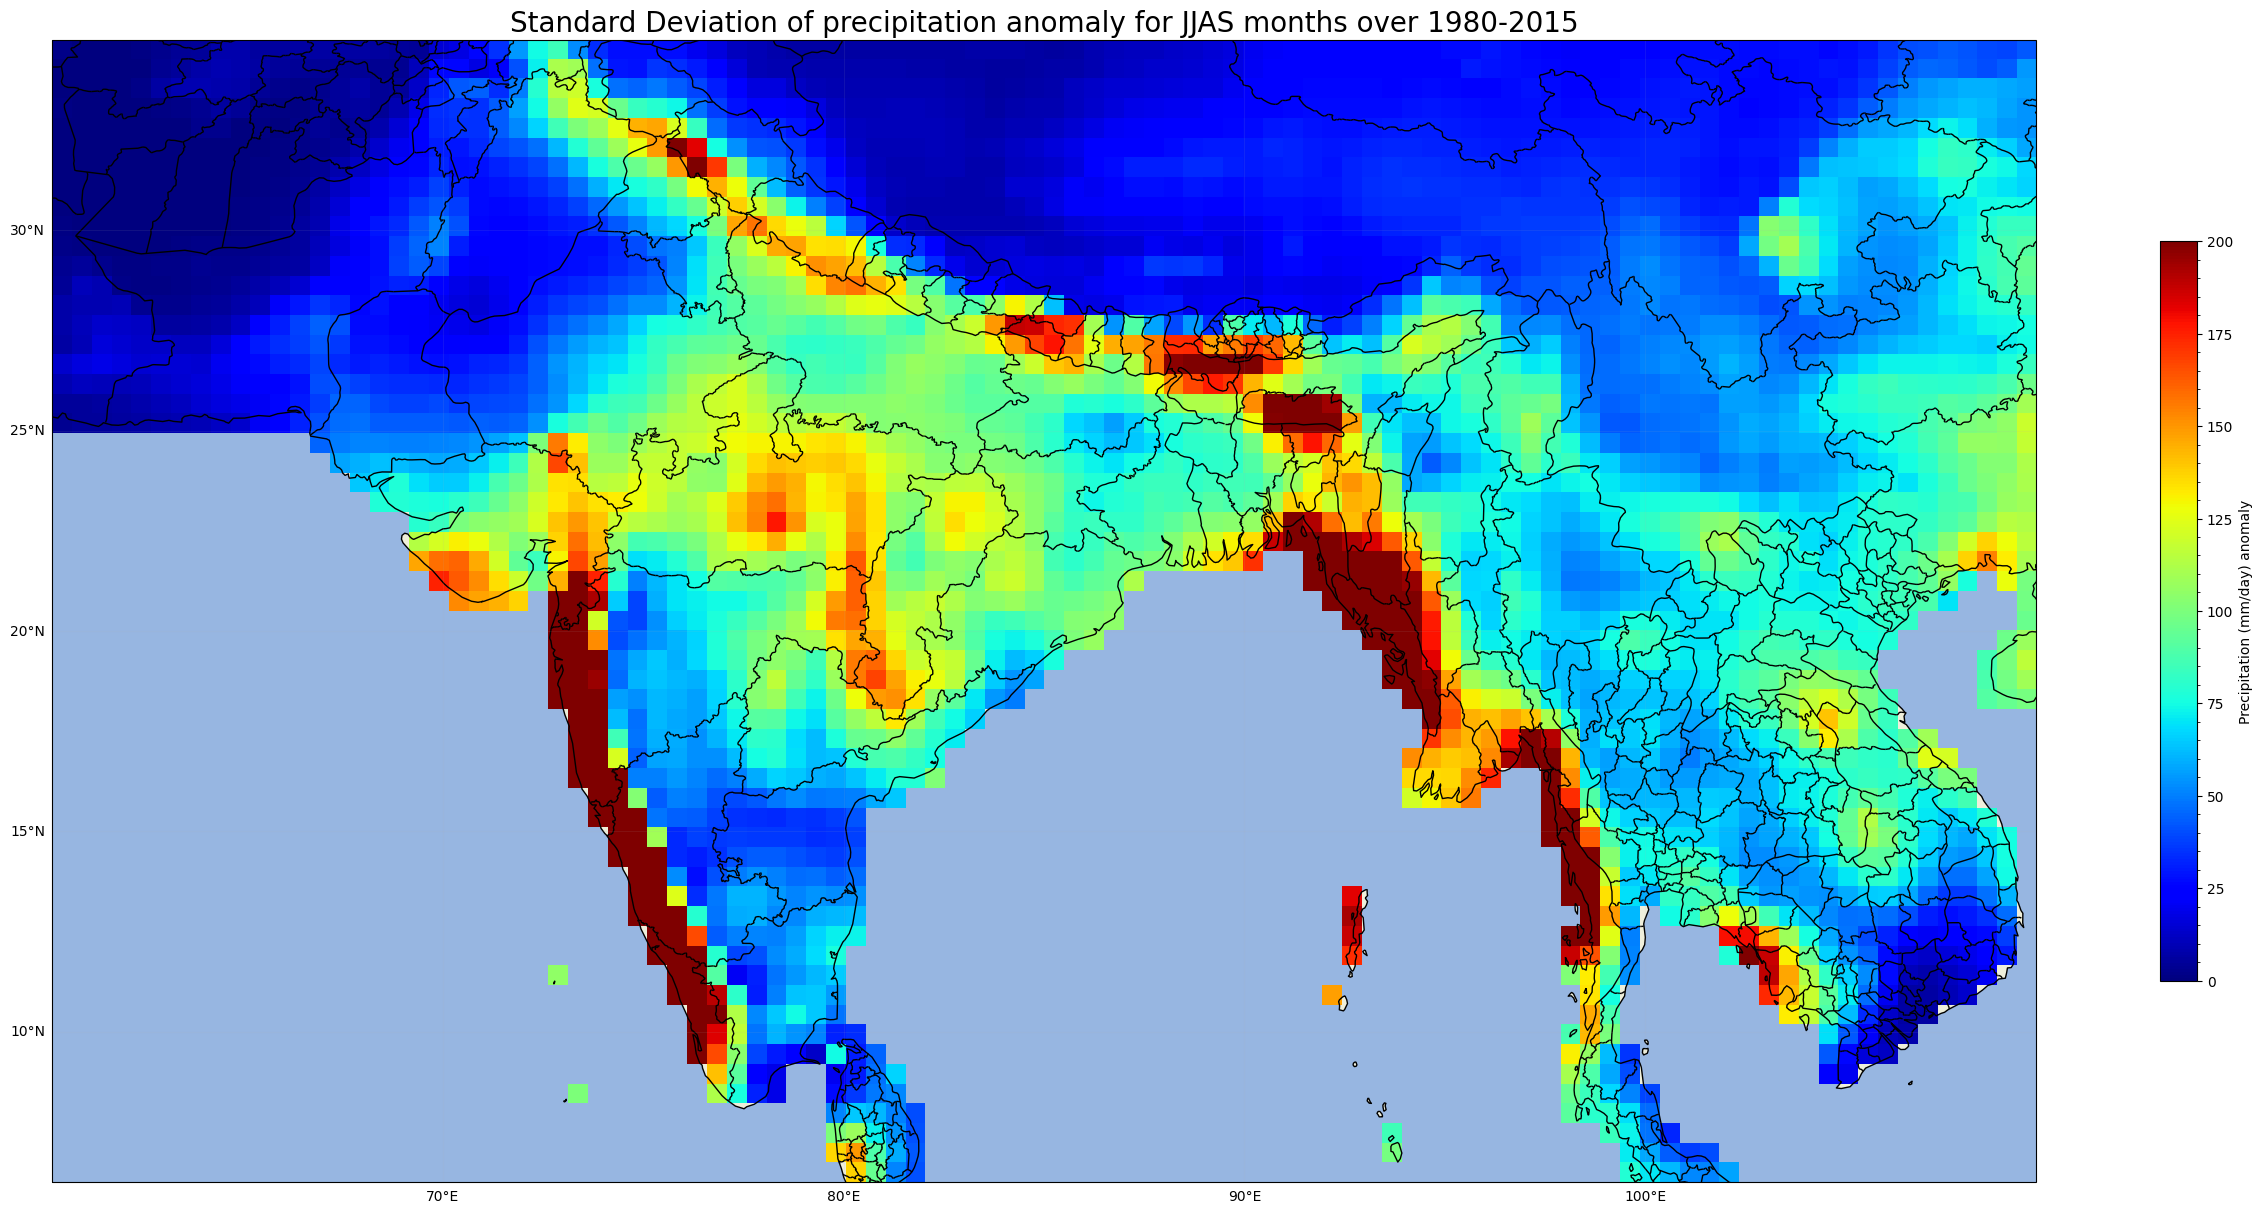

In [69]:
# importing the required libraries

# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr


# # loading the cru datasets 

# t_min_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmn.1981.2020_MAM.nc')
# t_max_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmx.1981.2020_MAM.nc')
# # t_max_dataset

# t_min_mam = t_min_mam.tmn
# t_max_mam = t_max_mam.tmx

lon = std_data_mean.lon
lat = std_data_mean.lat


# t_min_mam_mean = t_min_mam.mean(dim='time')
# t_max_mam_mean = t_max_mam.mean(dim='time')

# # difference between t_min_mam and t_max_mam to get the diurnal temperature range for mam months

# t_dtr_mam = t_max_mam_mean - t_min_mam_mean



fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(std_data_mean,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower', vmin=0 ,vmax=200)
plt.title('Standard Deviation of precipitation anomaly for JJAS months over 1980-2015',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Precipitation (mm/day) anomaly')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)

In [70]:
data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/cru_ts4.06.1901.2021.tmp.dat.nc')

FileNotFoundError: [Errno 2] No such file or directory: b'/home/shiv/Documents/GitHub/EES405/cru_ts4.06.1901.2021.tmp.dat.nc'

In [ ]:
data

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1452)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2021-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    history:      Fri 20 May 20:00:15 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [ ]:
corr_data = xr.open_dataset('../lab_session_03/fldcor.tmp.pre.nc')

In [ ]:
corr_data

<xarray.Dataset>
Dimensions:    (time: 9, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 2010-03-16 2010-04-16 ... 2010-11-16
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tmp        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.06 Mean Temperature
    history:      Thu Feb 16 20:09:12 2023: cdo -fldcor -selname,tmp 1990.201...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [ ]:
corr_data.pre

<xarray.DataArray 'pre' (time: 9, lat: 1, lon: 1)>
[9 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-03-16 2010-04-16 ... 2010-11-16
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [ ]:
plt.plot(corr_data.pre.squeeze(),corr_data.tmp.squeeze())

AttributeError: 'Dataset' object has no attribute 'tmp'

In [ ]:
import nctoolkit as nc

In [ ]:
files = ["../lab_session_03/pre.nc","../lab_session_03/tmp.nc"]
ds = nc.open_data(files)
ds.merge()
ds.cor_time("pre","tmp")
ds.plot()
# ds.to_xarray().cor_time().plot()

ValueError: ncatted -a long_name,cor,o,c,"Correlation between pre & tmp" /tmp/nctoolkitmhplmbxqnctoolkittmp9t9pqg62.nc /tmp/nctoolkitmhplmbxqnctoolkittmpe1k8y4fe.nc was not successful. Check output

In [ ]:
pre_data = xr.open_dataset('../lab_session_03/pre.nc')
tmp_data = xr.open_dataset('../lab_session_03/tmp.nc')

corr = nc.cor_time('../lab_session_03/pre.nc','../lab_session_03/tmp.nc')

TypeError: Please check x is a dataset

In [ ]:
rim_data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_03/std.anomaly.nc')

In [ ]:
rim_data

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 100, lat: 58)
Coordinates:
  * time       (time) datetime64[ns] 1998-01-30T12:00:00
  * lon        (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat        (lat) float32 6.25 6.75 7.25 7.75 ... 33.25 33.75 34.25 34.75
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pre        (time, lat, lon) float32 ...
    stn        (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.4
    history:      Sat Feb 18 14:18:42 2023: cdo timstd anomaly.nc std.anomaly...
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.06 Precipitation
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [ ]:
rim_data = rim_data.pre

In [ ]:
rim_data

<xarray.DataArray 'pre' (time: 1, lat: 58, lon: 100)>
[5800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1998-01-30T12:00:00
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.2 108.8 109.2 109.8
  * lat      (lat) float32 6.25 6.75 7.25 7.75 8.25 ... 33.25 33.75 34.25 34.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [ ]:
rim_data = rim_data.squeeze()

In [ ]:
rim_data_lon = rim_data.lon
rim_data_lat = rim_data.lat

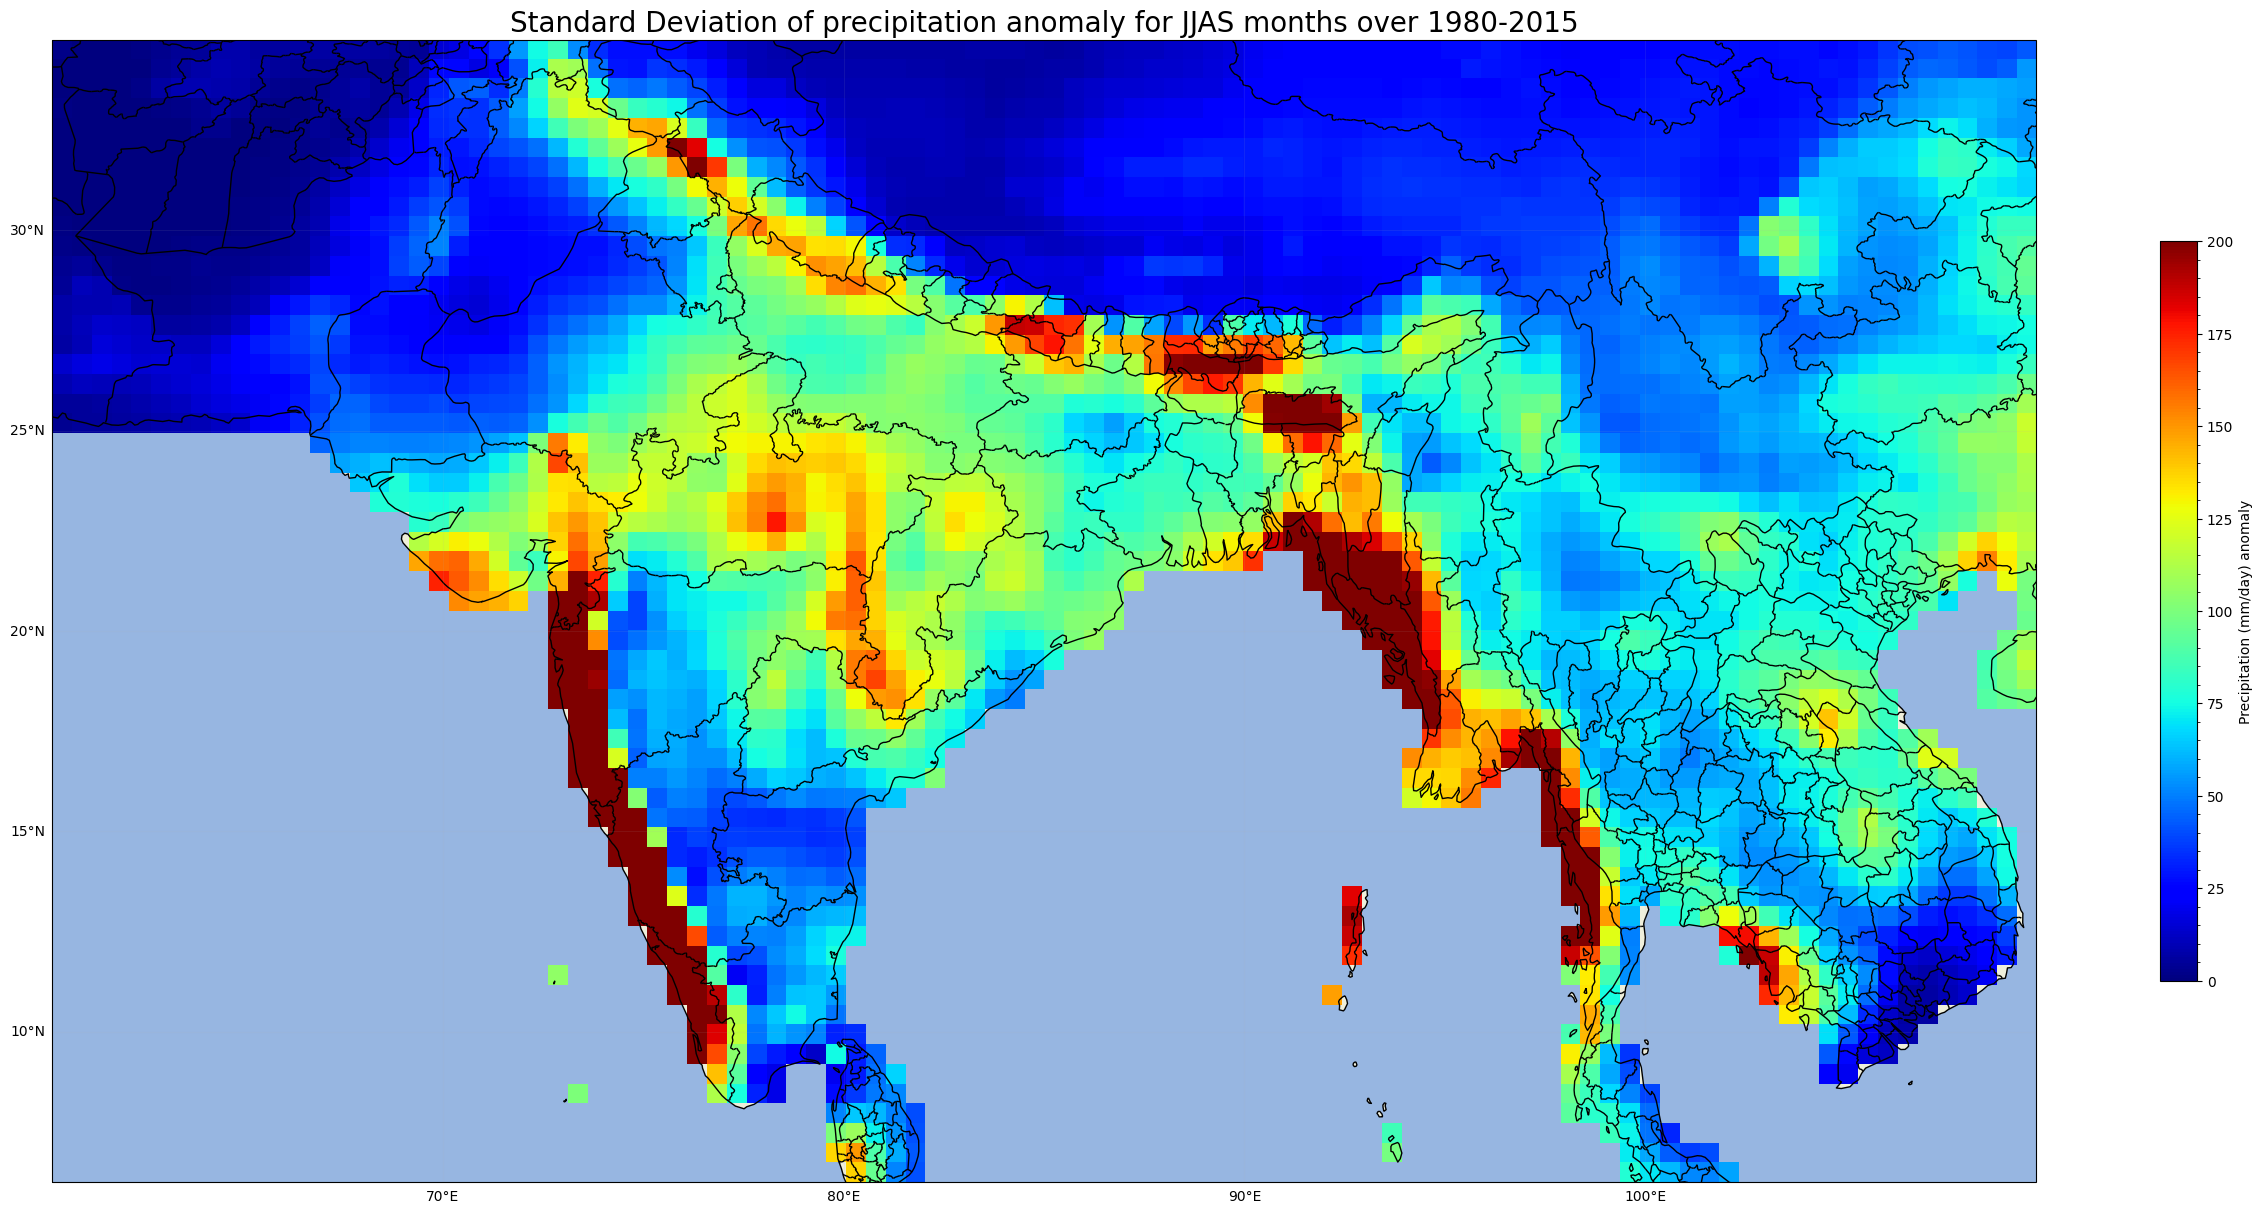

In [ ]:
# importing the required libraries

# import numpy as np
# import matplotlib.pyplot as plt
# import xarray as xr


# # loading the cru datasets 

# t_min_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmn.1981.2020_MAM.nc')
# t_max_mam = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_02/cru_tmx.1981.2020_MAM.nc')
# # t_max_dataset

# t_min_mam = t_min_mam.tmn
# t_max_mam = t_max_mam.tmx

# lon = std_data.lon
# lat = std_data.lat


# t_min_mam_mean = t_min_mam.mean(dim='time')
# t_max_mam_mean = t_max_mam.mean(dim='time')

# # difference between t_min_mam and t_max_mam to get the diurnal temperature range for mam months

# t_dtr_mam = t_max_mam_mean - t_min_mam_mean



fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(rim_data,extent=(rim_data_lon.min(),rim_data_lon.max(),rim_data_lat.min(),rim_data_lat.max()),cmap='jet',origin='lower', vmin=0 ,vmax=200)
plt.title('Standard Deviation of precipitation anomaly for JJAS months over 1980-2015',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Precipitation (mm/day) anomaly')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)

Question:4 Find time series of correlation between precipitation and mean temperature from CRU data.

In [71]:
pre_tmp_fldcor = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_03/pre.tmp.ymonmean.nc')

In [72]:
pre_tmp_fldcor

<xarray.Dataset>
Dimensions:    (time: 9, bnds: 2, lon: 1, lat: 1)
Coordinates:
  * time       (time) datetime64[ns] 2010-03-16 2010-04-16 ... 2010-11-16
  * lon        (lon) float64 0.0
  * lat        (lat) float64 0.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    pre        (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    source:       Run ID = 2205201912. Data generated from:pre.2204291209.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.06 Precipitation
    history:      Mon Feb 20 15:08:28 2023: cdo fldcor pre.ymonmean.nc tmp.ym...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [73]:
pre_tmp_fldcor = pre_tmp_fldcor.pre

In [74]:
pre_tmp_fldcor

<xarray.DataArray 'pre' (time: 9, lat: 1, lon: 1)>
[9 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-03-16 2010-04-16 ... 2010-11-16
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [75]:
pre_tmp_fldcor_data = pre_tmp_fldcor.squeeze(dim=['lat','lon'])

In [76]:
tmp = pre_tmp_fldcor.time

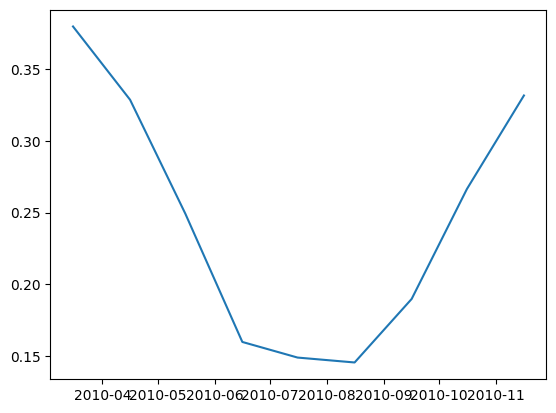

In [77]:
plt.plot(tmp,pre_tmp_fldcor_data)

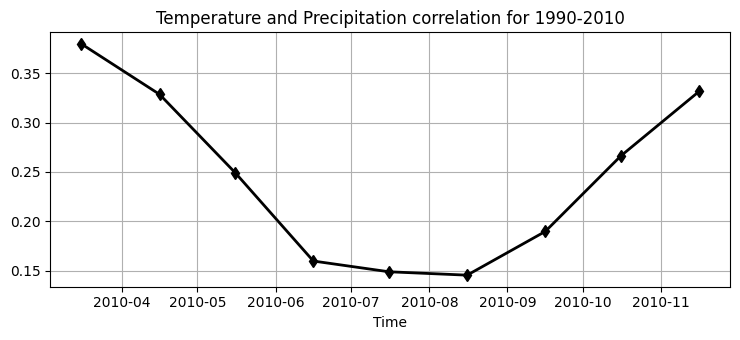

In [84]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()

plt.plot(tmp, pre_tmp_fldcor_data, 'kd-', linewidth=2)
plt.xlabel("Time")
spacing = 0.100
fig.subplots_adjust(bottom=spacing)
plt.minorticks_on
plt.grid(True)
plt.title('Temperature and Precipitation correlation for 1990-2010')
plt.show()


Question 5: Spatial map of correlation between precipitation and mean temperature from CRU data.

In [85]:
tmp_pre_timcor = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_03/spatial2.nc')

In [87]:
tmp_pre_timcor = tmp_pre_timcor.pre

In [88]:
tmp_pre_timcor

<xarray.DataArray 'pre' (time: 1, lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-08-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [89]:
tmp_pre_timcor = tmp_pre_timcor.squeeze(dim=['time'])

In [90]:
tmp_pre_timcor

<xarray.DataArray 'pre' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2010-08-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

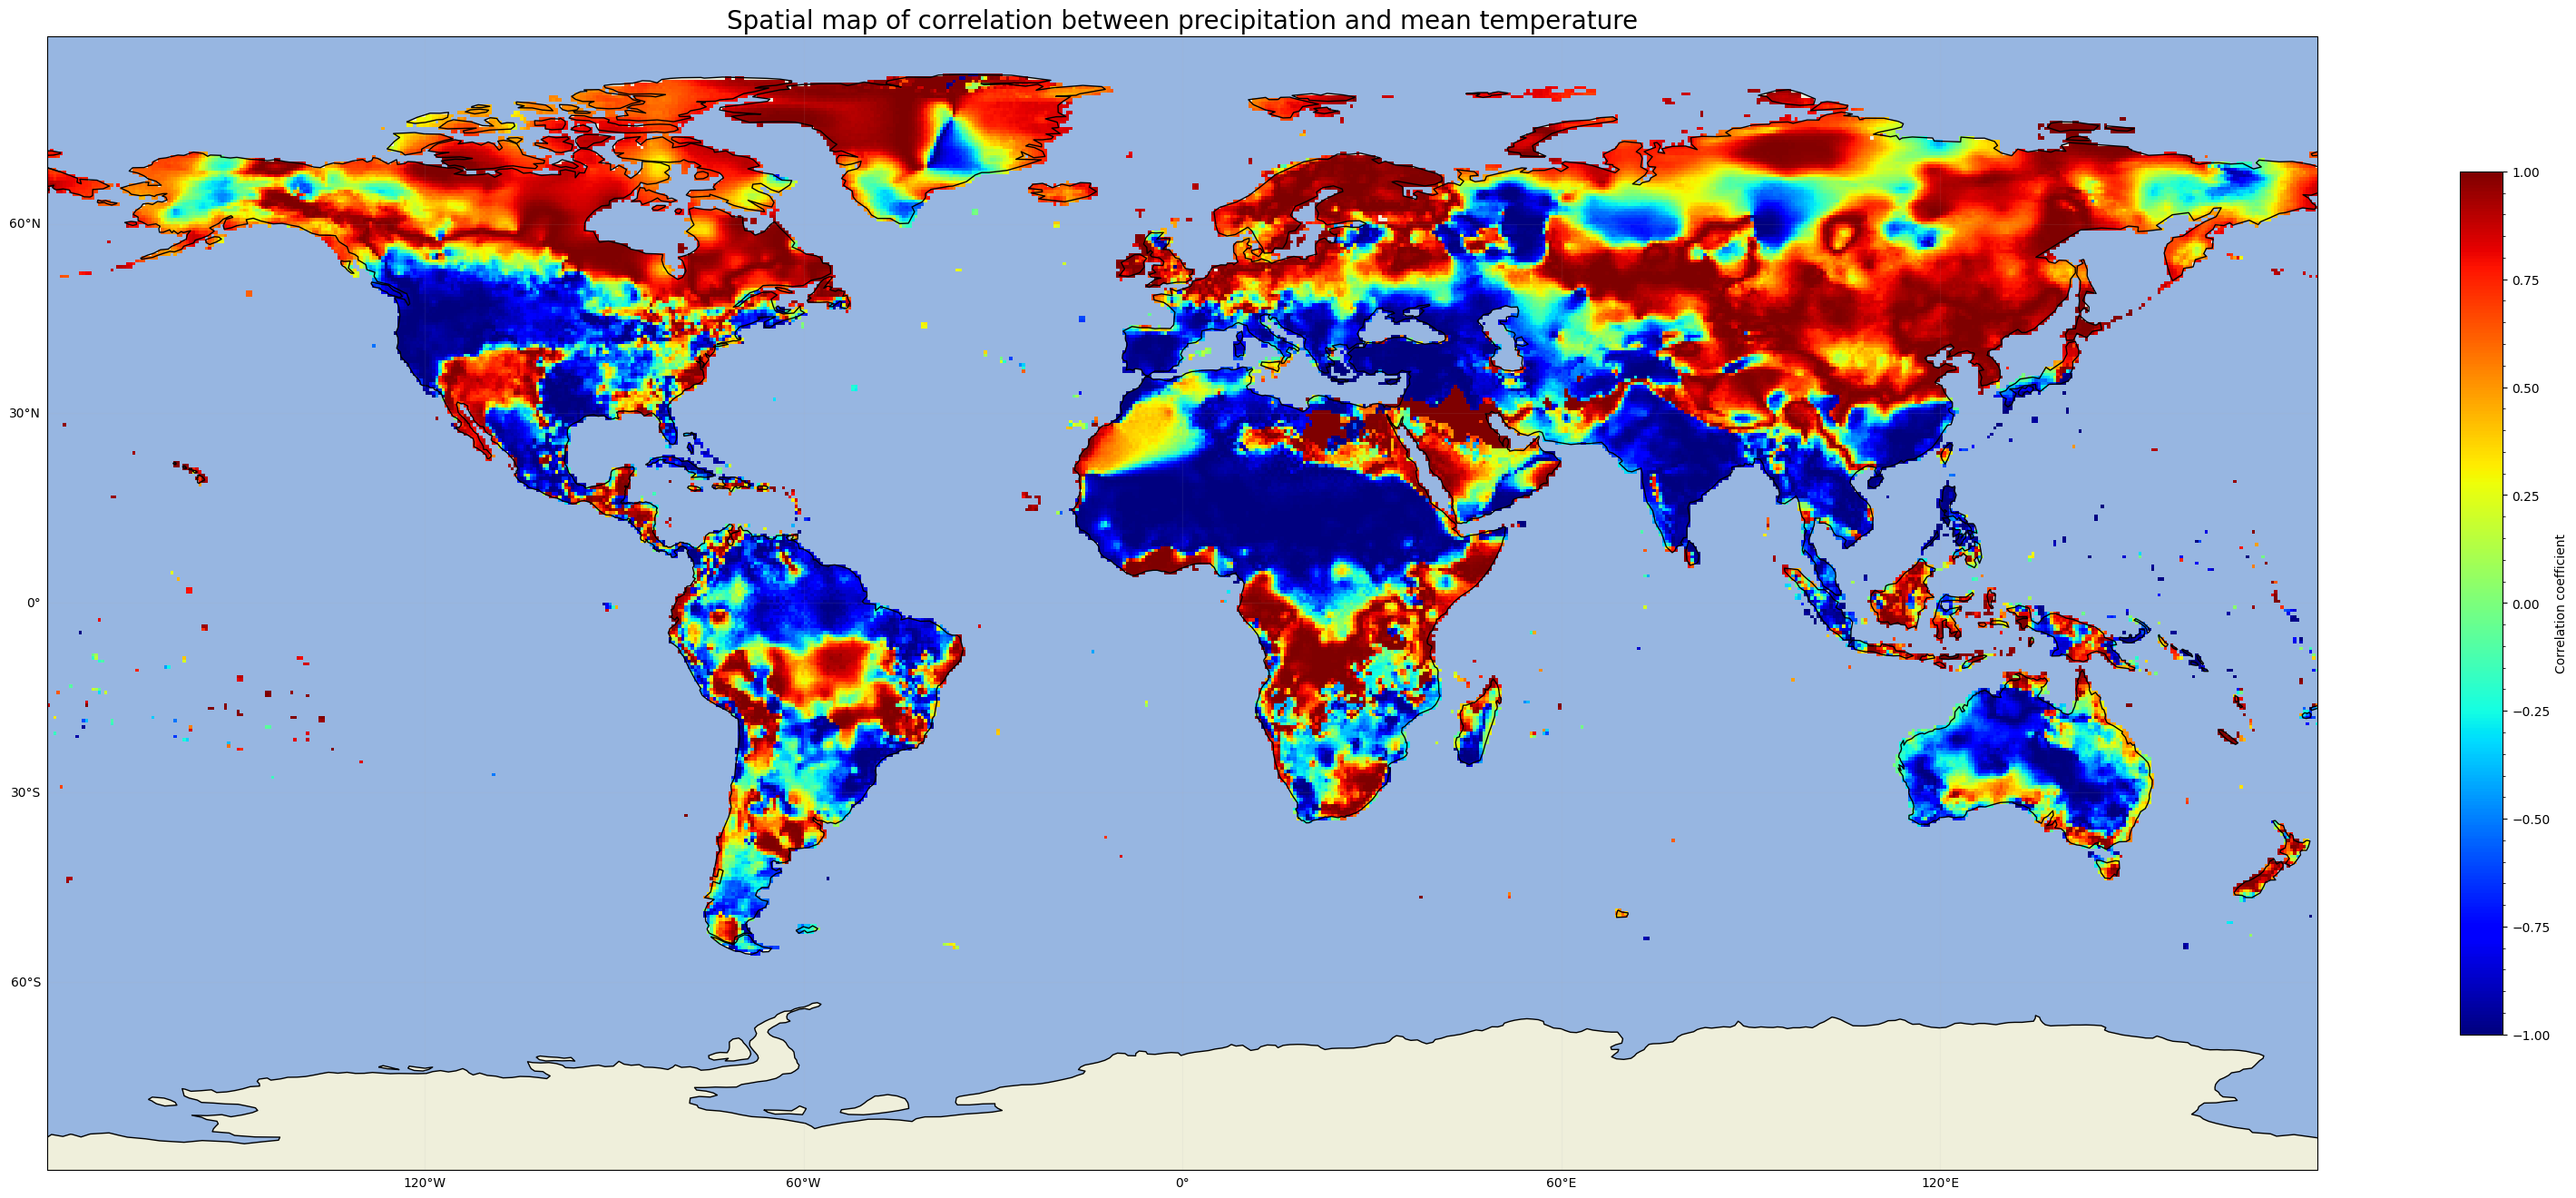

In [93]:


cor_lon = tmp_pre_timcor.lon
cor_lat = tmp_pre_timcor.lat





fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(tmp_pre_timcor,extent=(cor_lon.min(),cor_lon.max(),cor_lat.min(),cor_lat.max()),cmap='jet',origin='lower')
plt.title('Spatial map of correlation between precipitation and mean temperature',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Correlation coefficient')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)

Question 6: Use CRU precipitation data and NOAA OLR Data.  
Remap them (CRU == > NOAA)  
Plot spatial correlation between them during JJA season

In [94]:
olr_pre_timcor = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_03/spatial.olr.pre.nc')

In [96]:
olr_pre_timcor = olr_pre_timcor.pre

In [97]:
olr_pre_timcor

<xarray.DataArray 'pre' (time: 1, lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2010-08-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [99]:
olr_pre_timcor = olr_pre_timcor.squeeze(dim=['time'])

In [100]:
olr_pre_timcor

<xarray.DataArray 'pre' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2010-08-16
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

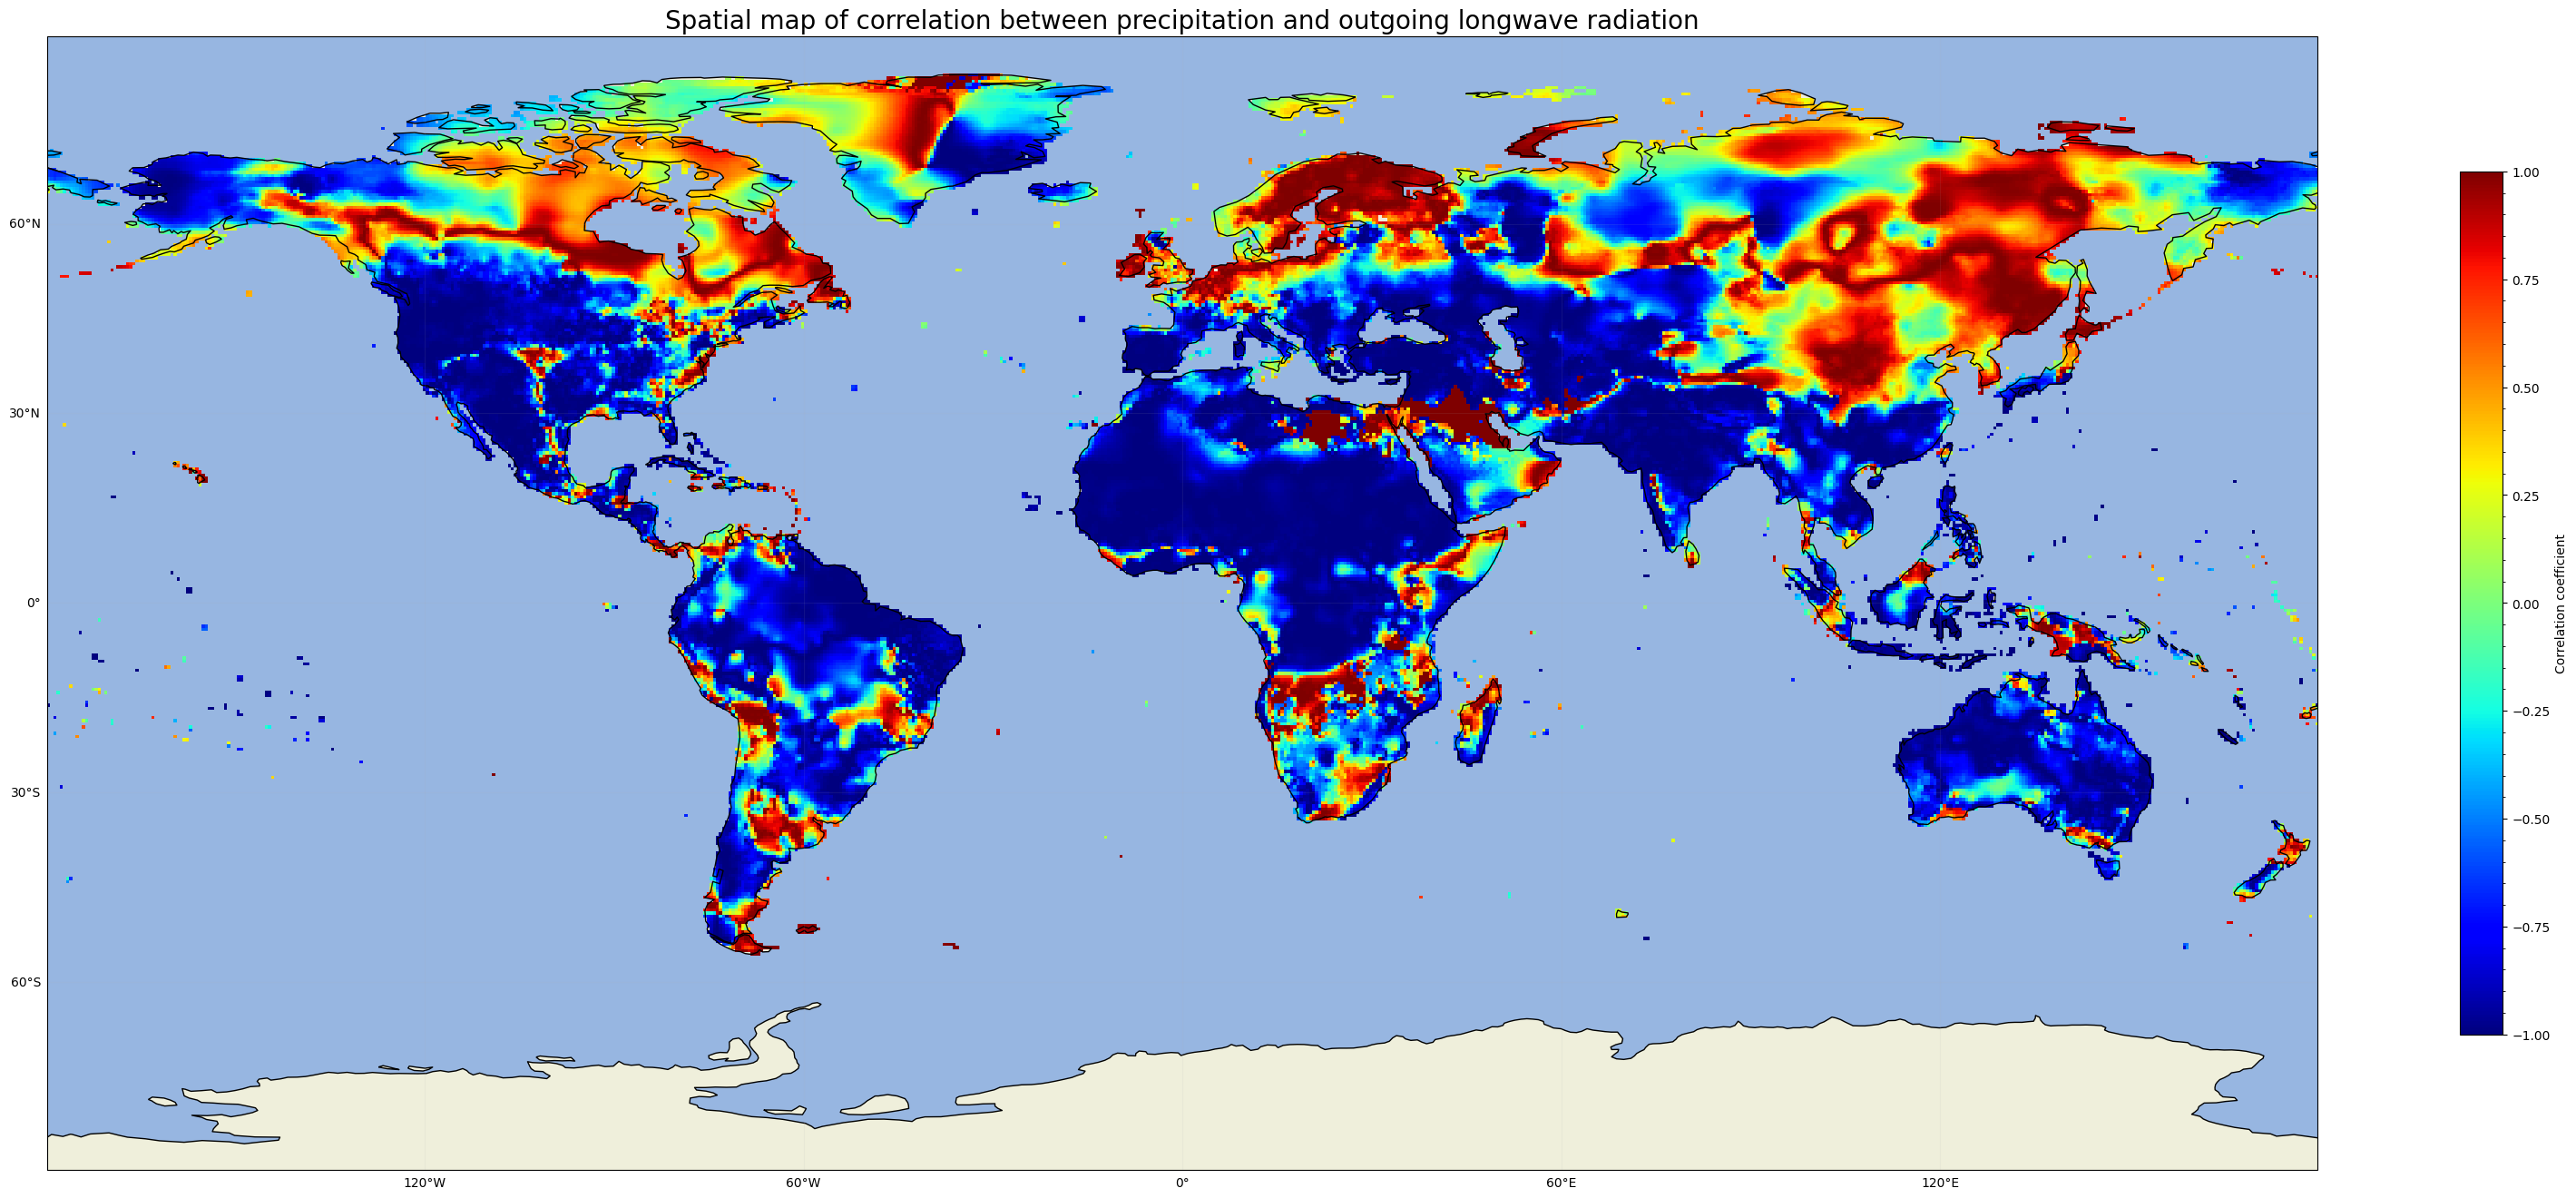

In [103]:


cor_lon = tmp_pre_timcor.lon
cor_lat = tmp_pre_timcor.lat





fig = plt.figure(figsize=(32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(olr_pre_timcor,extent=(cor_lon.min(),cor_lon.max(),cor_lat.min(),cor_lat.max()),cmap='jet',origin='lower')
plt.title('Spatial map of correlation between precipitation and outgoing longwave radiation',fontsize=20)
# plt.legend(['Temp'])

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
# ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Correlation coefficient')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig("/home/shiv/Documents/GitHub/EES405/plots/assignment_1/Diurnal temperature range 1981-2020 for MAM months",dpi=600)

Question 7: Year to Year Variation of (Time evolution) of area averaged of hot season (MAM) temperatures
(seasonal anomalies normalized with standard deviation) over CIR.

In [152]:
q7 = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/lab_session_03/q7.nc',decode_times=False)

In [153]:
q7

<xarray.Dataset>
Dimensions:  (time: 121, lon: 1, lat: 1)
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 117.0 118.0 119.0 120.0
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Data variables:
    tmp      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.4
    source:       Run ID = 2205201912. Data generated from:tmp.2204291209.dtb
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    title:        CRU TS4.06 Mean Temperature
    history:      Mon Feb 20 15:43:01 2023: cdo -r -settaxis,1901-01-01,00:00...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk
    frequency:    year
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [154]:
q7 = q7.tmp

In [155]:
q7

<xarray.DataArray 'tmp' (time: 121, lat: 1, lon: 1)>
[121 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 117.0 118.0 119.0 120.0
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    cell_methods:                time: mean
    correlation_decay_distance:  1200.0

In [156]:
q7 = q7.squeeze(dim=['lon','lat'])

In [158]:
q7

<xarray.DataArray 'tmp' (time: 121)>
[121 values with dtype=float32]
Coordinates:
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 ... 117.0 118.0 119.0 120.0
    lon      float64 0.0
    lat      float64 0.0
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    cell_methods:                time: mean
    correlation_decay_distance:  1200.0

In [159]:
time = q7.time

y=0.000036x+(0.007387)


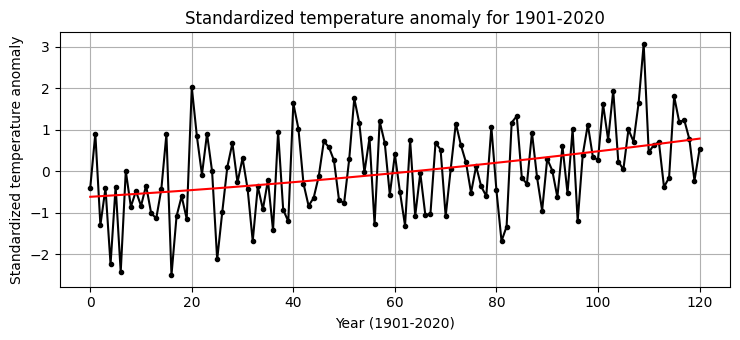

In [165]:
plt.plot(time,q7, 'k.-')
plt.xlabel("Year (1901-2020)")
plt.ylabel("Standardized temperature anomaly")
plt.title("Standardized temperature anomaly for 1901-2020")
plt.minorticks_on
plt.grid(True)


# calc the trendline
z = np.polyfit(q7.time, q7, 2)
p = np.poly1d(z)
plt.plot(q7.time,p(q7.time),"r-")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

Mastii time